In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from xgboost import XGBClassifier

import seaborn as sns 


%matplotlib inline

In [3]:
xg1 = XGBClassifier()
#xg1=xg1.fit(x_train, y_train)

#score(xg1, x_train, y_train, x_test, y_test, train=False)

In [4]:
x = np.genfromtxt('preprocessed_x.csv', delimiter=',')
y = np.genfromtxt('preprocessed_y.csv', delimiter=',', dtype= None)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  


                   precision    recall  f1-score   support

      b'bathroom'       0.10      0.06      0.08        16
         b'class'       0.00      0.00      0.00        11
       b'driving'       0.13      0.04      0.06        48
        b'eating'       0.27      0.31      0.29        65
         b'lying'       0.72      0.85      0.78       266
         b'other'       0.28      0.10      0.14        83
        b'riding'       0.11      0.07      0.08        15
b'riding_bicycle'       0.00      0.00      0.00        17
       b'sitting'       0.42      0.57      0.48       208
      b'sleeping'       0.29      0.13      0.18        15
      b'standing'       0.00      0.00      0.00         7
b'using_computer'       0.56      0.54      0.55       168
       b'walking'       0.60      0.64      0.62        92

         accuracy                           0.52      1011
        macro avg       0.27      0.25      0.25      1011
     weighted avg       0.48      0.52      0.49      

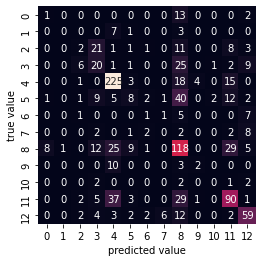

In [6]:

fin_test = np.array([])
fin_pred = np.array([])

for i,(train, test) in enumerate(KFold(n_splits=3).split(x)):
    #Train-Test-Split
    x_train = x[train]
    y_train = y[train]
    x_test = x[test]
    y_test = y[test]
    
    xg1.fit(x_train, y_train)

    fin_test = np.concatenate((fin_test, y_test), axis=0)
    fin_pred = np.concatenate((fin_pred, xg1.predict(x_test)), axis=0)

print(classification_report(fin_test, fin_pred))

sns.heatmap(confusion_matrix(fin_test, fin_pred), square= True, fmt ='.0f', annot=True, cbar=False)
plt.xlabel("predicted value")
plt.ylabel("true value")
plt.show()
